In [ ]:
!nvidia-smi

Sun Mar  2 09:06:50 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   63C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install noisereduce

In [ ]:
import os
import librosa
import librosa.display
import noisereduce as nr
import soundfile as sf
import numpy as np
from google.colab import drive


# 🔹 Step 2: Define paths (Update this with your actual dataset folder)
dataset_path = "/content/drive/MyDrive/VoiceDataset/WAV_Files"
output_path = "/content/drive/MyDrive/VoiceDataset/Denoised_WAV"

# Create output directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# 🔹 Step 3: Noise Reduction Function
def reduce_noise(file_path, output_file):
    """ Load, reduce noise, and save the denoised file """
    y, sr = librosa.load(file_path, sr=None)  # Load original audio
    reduced_audio = nr.reduce_noise(y=y, sr=sr)  # Apply noise reduction
    sf.write(output_file, reduced_audio, sr)  # Save the denoised audio

# 🔹 Step 4: Process All .wav Files
for filename in os.listdir(dataset_path):
    if filename.endswith(".wav"):
        file_path = os.path.join(dataset_path, filename)
        output_file = os.path.join(output_path, f"denoised_{filename}")

        print(f"Processing {filename}...")
        reduce_noise(file_path, output_file)

print("✅ Noise reduction completed. Denoised files saved in:", output_path)


Processing Audio 1.wav...
Processing Audio 2.wav...
Processing Audio 3.wav...
Processing Audio 5.wav...
Processing Audio 6.wav...
Processing Audio 7.wav...
Processing Audio 4.wav...
Processing Audio 8.wav...
Processing Audio 9.wav...
Processing Audio 10.wav...
Processing Audio 11.wav...
Processing Audio 12.wav...
Processing Audio 13.wav...
Processing Audio 14.wav...
Processing Audio 15.wav...
Processing Audio 16.wav...
Processing Audio 17.wav...
Processing Audio 18.wav...
Processing Audio 20.wav...
Processing Audio 19.wav...
Processing Audio 21.wav...
Processing Audio 22.wav...
Processing Audio 23.wav...
Processing Audio 24.wav...
Processing Audio 25.wav...
Processing Audio  26.wav...
Processing Audio 27.wav...
Processing Audio 28.wav...
Processing Audio 30.wav...
Processing Audio 29.wav...
Processing Audio 31.wav...
Processing Audio 34.wav...
Processing Audio 32.wav...
Processing Audio 33.wav...
Processing Audio 35.wav...
Processing Audio 37.wav...
Processing Audio 36.wav...
Processin

<ipython-input-10-360754efdbdb>:31: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


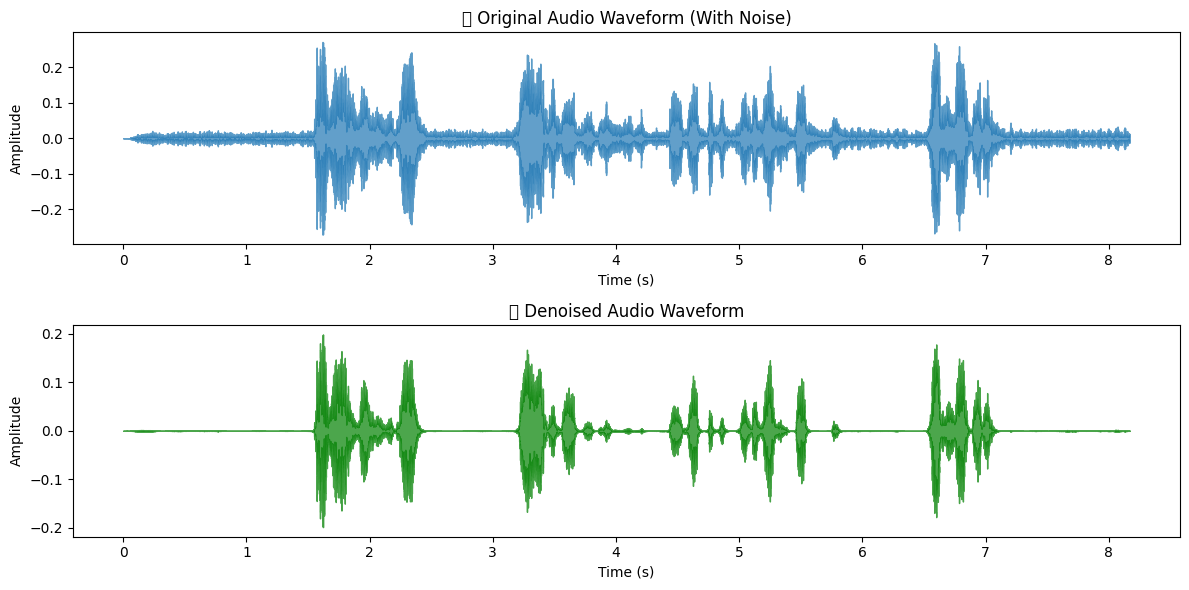

<ipython-input-10-360754efdbdb>:49: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-360754efdbdb>:49: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


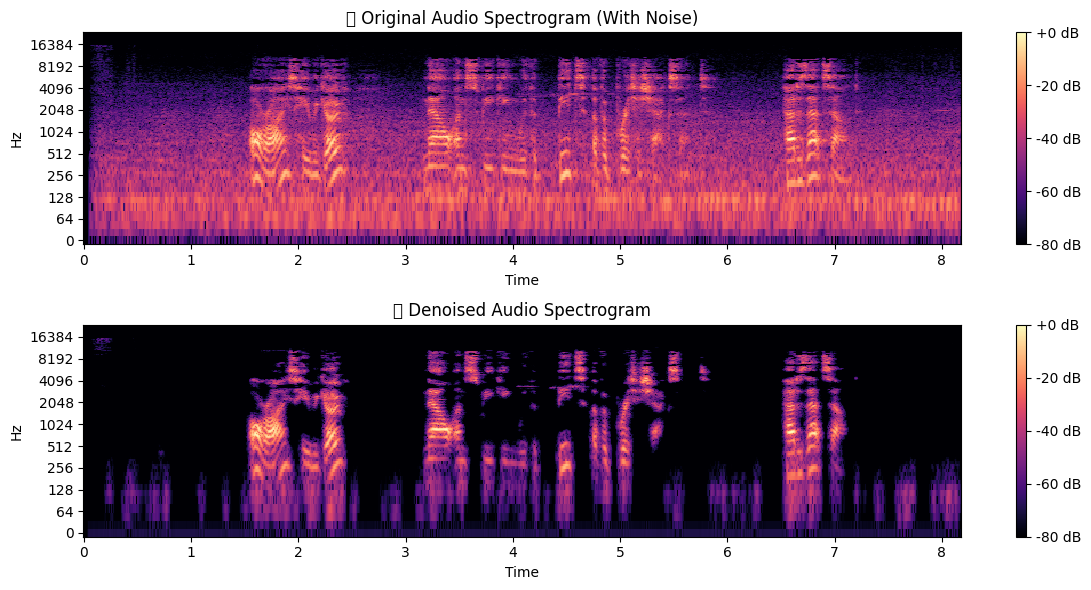

🔴 Playing Original Audio:


🟢 Playing Denoised Audio:


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import os

# 🔹 Step 1: Set file paths (update if needed)
original_file = "/content/drive/MyDrive/VoiceDataset/WAV_Files/Audio 52.wav"  # Change to an actual file
denoised_file = "/content/drive/MyDrive/VoiceDataset/Denoised_WAV/denoised_Audio 52.wav"  # Change to match output

# 🔹 Step 2: Load both audio files
y_orig, sr_orig = librosa.load(original_file, sr=None)
y_denoised, sr_denoised = librosa.load(denoised_file, sr=None)

# 🔹 Step 3: Plot Waveforms
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
librosa.display.waveshow(y_orig, sr=sr_orig, alpha=0.7)
plt.title("🔴 Original Audio Waveform (With Noise)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
librosa.display.waveshow(y_denoised, sr=sr_denoised, color='green', alpha=0.7)
plt.title("🟢 Denoised Audio Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

# 🔹 Step 4: Plot Spectrograms
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
spec_orig = librosa.amplitude_to_db(np.abs(librosa.stft(y_orig)), ref=np.max)
librosa.display.specshow(spec_orig, sr=sr_orig, x_axis='time', y_axis='log')
plt.title("🔴 Original Audio Spectrogram (With Noise)")
plt.colorbar(format="%+2.0f dB")

plt.subplot(2, 1, 2)
spec_denoised = librosa.amplitude_to_db(np.abs(librosa.stft(y_denoised)), ref=np.max)
librosa.display.specshow(spec_denoised, sr=sr_denoised, x_axis='time', y_axis='log')
plt.title("🟢 Denoised Audio Spectrogram")
plt.colorbar(format="%+2.0f dB")

plt.tight_layout()
plt.show()

# 🔹 Step 5: Play Both Audio Files
print("🔴 Playing Original Audio:")
ipd.display(ipd.Audio(original_file, rate=sr_orig))

print("🟢 Playing Denoised Audio:")
ipd.display(ipd.Audio(denoised_file, rate=sr_denoised))


In [ ]:
import os

# Define your dataset path
dataset_path = "/content/drive/MyDrive/VoiceDataset/WAV_Files"

# Rename files by replacing spaces with underscores
for filename in os.listdir(dataset_path):
    if filename.endswith(".wav"):
        new_filename = filename.replace(" ", "_")  # Replace spaces with underscores
        old_file = os.path.join(dataset_path, filename)
        new_file = os.path.join(dataset_path, new_filename)

        # Rename file
        os.rename(old_file, new_file)
        print(f"Renamed: {filename} ➝ {new_filename}")

print("✅ File renaming completed!")


Renamed: Audio 1.wav ➝ Audio_1.wav
Renamed: Audio 2.wav ➝ Audio_2.wav
Renamed: Audio 3.wav ➝ Audio_3.wav
Renamed: Audio 5.wav ➝ Audio_5.wav
Renamed: Audio 6.wav ➝ Audio_6.wav
Renamed: Audio 7.wav ➝ Audio_7.wav
Renamed: Audio 4.wav ➝ Audio_4.wav
Renamed: Audio 8.wav ➝ Audio_8.wav
Renamed: Audio 9.wav ➝ Audio_9.wav
Renamed: Audio 10.wav ➝ Audio_10.wav
Renamed: Audio 11.wav ➝ Audio_11.wav
Renamed: Audio 12.wav ➝ Audio_12.wav
Renamed: Audio 13.wav ➝ Audio_13.wav
Renamed: Audio 14.wav ➝ Audio_14.wav
Renamed: Audio 15.wav ➝ Audio_15.wav
Renamed: Audio 16.wav ➝ Audio_16.wav
Renamed: Audio 17.wav ➝ Audio_17.wav
Renamed: Audio 18.wav ➝ Audio_18.wav
Renamed: Audio 20.wav ➝ Audio_20.wav
Renamed: Audio 19.wav ➝ Audio_19.wav
Renamed: Audio 21.wav ➝ Audio_21.wav
Renamed: Audio 22.wav ➝ Audio_22.wav
Renamed: Audio 23.wav ➝ Audio_23.wav
Renamed: Audio 24.wav ➝ Audio_24.wav
Renamed: Audio 25.wav ➝ Audio_25.wav
Renamed: Audio  26.wav ➝ Audio__26.wav
Renamed: Audio 27.wav ➝ Audio_27.wav
Renamed: Audio 28

In [ ]:
import os

# Define the folder path
folder_path = "/content/drive/MyDrive/VoiceDataset/Denoised_WAV"

# List all files in the directory
for filename in os.listdir(folder_path):
    if filename.startswith("denoised_") and filename.endswith(".wav"):
        old_path = os.path.join(folder_path, filename)
        new_filename = filename.replace("denoised_", "", 1)  # Remove "denoised_" only once
        new_path = os.path.join(folder_path, new_filename)

        # Rename the file
        os.rename(old_path, new_path)
        print(f"Renamed: {old_path} ➝ {new_path}")

print("✅ All files renamed successfully!")


Renamed: /content/drive/MyDrive/VoiceDataset/Denoised_WAV/denoised_Audio_1.wav ➝ /content/drive/MyDrive/VoiceDataset/Denoised_WAV/Audio_1.wav
Renamed: /content/drive/MyDrive/VoiceDataset/Denoised_WAV/denoised_Audio_2.wav ➝ /content/drive/MyDrive/VoiceDataset/Denoised_WAV/Audio_2.wav
Renamed: /content/drive/MyDrive/VoiceDataset/Denoised_WAV/denoised_Audio_3.wav ➝ /content/drive/MyDrive/VoiceDataset/Denoised_WAV/Audio_3.wav
Renamed: /content/drive/MyDrive/VoiceDataset/Denoised_WAV/denoised_Audio_5.wav ➝ /content/drive/MyDrive/VoiceDataset/Denoised_WAV/Audio_5.wav
Renamed: /content/drive/MyDrive/VoiceDataset/Denoised_WAV/denoised_Audio_6.wav ➝ /content/drive/MyDrive/VoiceDataset/Denoised_WAV/Audio_6.wav
Renamed: /content/drive/MyDrive/VoiceDataset/Denoised_WAV/denoised_Audio_7.wav ➝ /content/drive/MyDrive/VoiceDataset/Denoised_WAV/Audio_7.wav
Renamed: /content/drive/MyDrive/VoiceDataset/Denoised_WAV/denoised_Audio_4.wav ➝ /content/drive/MyDrive/VoiceDataset/Denoised_WAV/Audio_4.wav
Rename

In [ ]:
import os

clean_path = "/content/drive/MyDrive/VoiceDataset/Denoised_WAV"

print("✅ Checking Clean File Names...")
for file in os.listdir(clean_path):
    print(file)


✅ Checking Clean File Names...
Audio_1.wav
Audio_2.wav
Audio_3.wav
Audio_5.wav
Audio_6.wav
Audio_7.wav
Audio_4.wav
Audio_8.wav
Audio_9.wav
Audio_10.wav
Audio_11.wav
Audio_12.wav
Audio_13.wav
Audio_14.wav
Audio_15.wav
Audio_16.wav
Audio_17.wav
Audio_18.wav
Audio_20.wav
Audio_19.wav
Audio_21.wav
Audio_22.wav
Audio_23.wav
Audio_24.wav
Audio_25.wav
Audio_26.wav
Audio_27.wav
Audio_28.wav
Audio_30.wav
Audio_29.wav
Audio_31.wav
Audio_34.wav
Audio_32.wav
Audio_33.wav
Audio_35.wav
Audio_37.wav
Audio_36.wav
Audio_40.wav
Audio_38.wav
Audio_41.wav
Audio_44.wav
Audio_43.wav
Audio_42.wav
Audio_45.wav
Audio_46.wav
Audio_47.wav
Audio_49.wav
Audio_48.wav
Audio_50.wav
Audio_52.wav
Audio_51.wav
Audio_53.wav
Audio_54.wav
Audio_55.wav
Audio_56.wav
Audio_57.wav
Audio_58.wav
Audio_59.wav
Audio_60.wav
Audio_61.wav
Audio_62.wav
Audio_63.wav
Audio_64.wav
Audio_65.wav
Audio_67.wav
Audio_66.wav
Audio_69.wav
Audio_68.wav
Audio_70.wav
Audio_71.wav
Audio_72.wav
Audio_73.wav
Audio_74.wav
Audio_75.wav
Audio_76.wav
Aud

In [ ]:
import numpy as np
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt
from google.colab import drive


# 🔹 Define dataset paths
noisy_path = "/content/drive/MyDrive/VoiceDataset/WAV_Files"
clean_path = "/content/drive/MyDrive/VoiceDataset/Denoised_WAV"

# 🔹 Function to load audio & convert to Mel spectrogram
def audio_to_mel_spectrogram(file_path, n_mels=128, n_fft=2048, hop_length=512, target_length=500):
    y, sr = librosa.load(file_path, sr=None)
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)  # Convert to decibels

    # 🔹 Fix length for 2D array
    current_length = mel_spec_db.shape[1]
    if current_length < target_length:
        mel_spec_db = np.pad(mel_spec_db, ((0, 0), (0, target_length - current_length)), mode="constant")
    else:
        mel_spec_db = mel_spec_db[:, :target_length]

    return mel_spec_db, sr

# 🔹 Load all noisy & clean audio
noisy_spectrograms, clean_spectrograms = [], []
file_names = []

for file in os.listdir(noisy_path):
    if file.endswith(".wav"):
        noisy_file = os.path.join(noisy_path, file)
        clean_file = os.path.join(clean_path, file)

        if not os.path.exists(noisy_file):
            print(f"⚠️ Noisy file missing: {noisy_file}")
            continue
        if not os.path.exists(clean_file):
            print(f"⚠️ Clean file missing: {clean_file}")
            continue

        noisy_spec, _ = audio_to_mel_spectrogram(noisy_file)
        clean_spec, _ = audio_to_mel_spectrogram(clean_file)

        print(f"📌 {file} - Noisy Shape: {noisy_spec.shape}, Clean Shape: {clean_spec.shape}")

        if noisy_spec.shape != clean_spec.shape:
            print(f"⚠️ Shape Mismatch! Skipping: {file}")
            continue  # Skip mismatched files

        noisy_spectrograms.append(noisy_spec)
        clean_spectrograms.append(clean_spec)
        file_names.append(file)

# Convert to numpy arrays
noisy_spectrograms = np.array(noisy_spectrograms, dtype=object)
clean_spectrograms = np.array(clean_spectrograms, dtype=object)

print("Noisy Spectrograms Shape:", noisy_spectrograms.shape)
print("Clean Spectrograms Shape:", clean_spectrograms.shape)


📌 Audio_1.wav - Noisy Shape: (128, 500), Clean Shape: (128, 500)
📌 Audio_2.wav - Noisy Shape: (128, 500), Clean Shape: (128, 500)
📌 Audio_3.wav - Noisy Shape: (128, 500), Clean Shape: (128, 500)
📌 Audio_5.wav - Noisy Shape: (128, 500), Clean Shape: (128, 500)
📌 Audio_6.wav - Noisy Shape: (128, 500), Clean Shape: (128, 500)
📌 Audio_7.wav - Noisy Shape: (128, 500), Clean Shape: (128, 500)
📌 Audio_4.wav - Noisy Shape: (128, 500), Clean Shape: (128, 500)
📌 Audio_8.wav - Noisy Shape: (128, 500), Clean Shape: (128, 500)
📌 Audio_9.wav - Noisy Shape: (128, 500), Clean Shape: (128, 500)
📌 Audio_10.wav - Noisy Shape: (128, 500), Clean Shape: (128, 500)
📌 Audio_11.wav - Noisy Shape: (128, 500), Clean Shape: (128, 500)
📌 Audio_12.wav - Noisy Shape: (128, 500), Clean Shape: (128, 500)
📌 Audio_13.wav - Noisy Shape: (128, 500), Clean Shape: (128, 500)
📌 Audio_14.wav - Noisy Shape: (128, 500), Clean Shape: (128, 500)
📌 Audio_15.wav - Noisy Shape: (128, 500), Clean Shape: (128, 500)
📌 Audio_16.wav - No

In [ ]:
def normalize_spectrogram(spectrogram):
    return (spectrogram - spectrogram.min()) / (spectrogram.max() - spectrogram.min())

In [ ]:
# Convert lists to NumPy arrays
noisy_spectrograms = np.array(noisy_spectrograms)
clean_spectrograms = np.array(clean_spectrograms)

# Normalize
noisy_spectrograms = np.array([normalize_spectrogram(spec) for spec in noisy_spectrograms])
clean_spectrograms = np.array([normalize_spectrogram(spec) for spec in clean_spectrograms])

# Reshape to (128, time_steps, 1) for CNN input
noisy_spectrograms = noisy_spectrograms[..., np.newaxis]
clean_spectrograms = clean_spectrograms[..., np.newaxis]

print("✅ Noisy Shape:", noisy_spectrograms.shape)
print("✅ Clean Shape:", clean_spectrograms.shape)


✅ Noisy Shape: (99, 128, 500, 1)
✅ Clean Shape: (99, 128, 500, 1)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(noisy_spectrograms, clean_spectrograms, test_size=0.2, random_state=42)

print("✅ Training Set:", X_train.shape, Y_train.shape)
print("✅ Validation Set:", X_val.shape, Y_val.shape)


✅ Training Set: (79, 128, 500, 1) (79, 128, 500, 1)
✅ Validation Set: (20, 128, 500, 1) (20, 128, 500, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, BatchNormalization, Cropping2D

# 🔹 Model Input Shape
input_shape = (128, 500, 1)  # Fixed time steps to match your dataset
inputs = Input(shape=input_shape)

# 🔹 Encoder
x = Conv2D(32, (3,3), padding="same", activation="relu")(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), padding="same")(x)  # Output: (64, 250, 32)

x = Conv2D(64, (3,3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), padding="same")(x)  # Output: (32, 125, 64)

x = Conv2D(128, (3,3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), padding="same")(x)  # Output: (16, 63, 128)

# 🔹 Decoder
x = Conv2DTranspose(128, (3,3), strides=2, padding="same", activation="relu")(x)
x = BatchNormalization()(x)  # Output: (32, 126, 128)

x = Conv2DTranspose(64, (3,3), strides=2, padding="same", activation="relu")(x)
x = BatchNormalization()(x)  # Output: (64, 252, 64)

x = Conv2DTranspose(32, (3,3), strides=2, padding="same", activation="relu")(x)
x = BatchNormalization()(x)  # Output: (128, 504, 32)

# 🔹 Crop Extra Time Steps
x = Cropping2D(cropping=((0, 0), (2, 2)))(x)  # Removes 2 pixels from each side → (128, 500, 32)

# 🔹 Output Layer
outputs = Conv2D(1, (3,3), padding="same", activation="sigmoid")(x)  # Output: (128, 500, 1)

# 🔹 Build Model
autoencoder = Model(inputs, outputs)
autoencoder.compile(optimizer="adam", loss="mse")

# 🔹 Summary
autoencoder.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 128, 500, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 128, 500, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 128, 500, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 64, 250, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 64, 250, 64)         │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 64, 250, 64)         │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 32, 125, 64)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 32, 125, 128)        │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 32, 125, 128)        │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 16, 63, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 32, 126, 128)        │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 32, 126, 128)        │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_4 (Conv2DTranspose) │ (None, 64, 252, 64)         │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 64, 252, 64)         │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_5 (Conv2DTranspose) │ (None, 128, 504, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 128, 504, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ cropping2d (Cropping2D)              │ (None, 128, 500, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 128, 500, 1)         │             289 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 334,593 (1.28 MB)

 Trainable params: 333,697 (1.27 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
import numpy as np
import tensorflow as tf

# Reshape to fit the model (batch_size, height, width, channels)
noisy_spectrograms = np.expand_dims(noisy_spectrograms, axis=-1)  # Add channel dimension
clean_spectrograms = np.expand_dims(clean_spectrograms, axis=-1)

print("Noisy Spectrograms Shape:", noisy_spectrograms.shape)
print("Clean Spectrograms Shape:", clean_spectrograms.shape)


Noisy Spectrograms Shape: (99, 128, 500, 1, 1, 1)
Clean Spectrograms Shape: (99, 128, 500, 1, 1, 1)


In [ ]:
from sklearn.model_selection import train_test_split

# Split into train & validation sets (80-20 split)
X_train, X_val, Y_train, Y_val = train_test_split(noisy_spectrograms, clean_spectrograms, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape}, {Y_train.shape}")
print(f"Validation Set: {X_val.shape}, {Y_val.shape}")


Training Set: (79, 128, 500, 1, 1, 1), (79, 128, 500, 1, 1, 1)
Validation Set: (20, 128, 500, 1, 1, 1), (20, 128, 500, 1, 1, 1)


In [ ]:
print(f"X_train dtype: {X_train.dtype}, shape: {X_train.shape}")
print(f"Y_train dtype: {Y_train.dtype}, shape: {Y_train.shape}")


X_train dtype: object, shape: (79, 128, 500, 1, 1, 1)
Y_train dtype: object, shape: (79, 128, 500, 1, 1, 1)


In [ ]:
X_train = X_train.astype(np.float32)
Y_train = Y_train.astype(np.float32)
X_val = X_val.astype(np.float32)
Y_val = Y_val.astype(np.float32)

print(f"Fixed dtype: {X_train.dtype}, {Y_train.dtype}")


Fixed dtype: float32, float32


In [ ]:
print("Any NaN in X_train?", np.isnan(X_train).sum())
print("Any NaN in Y_train?", np.isnan(Y_train).sum())


Any NaN in X_train? 0
Any NaN in Y_train? 0


In [ ]:
X_train = np.nan_to_num(X_train)
Y_train = np.nan_to_num(Y_train)
X_val = np.nan_to_num(X_val)
Y_val = np.nan_to_num(Y_val)


In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"Y_val shape: {Y_val.shape}")


X_train shape: (79, 128, 500, 1, 1, 1)
Y_train shape: (79, 128, 500, 1, 1, 1)
X_val shape: (20, 128, 500, 1, 1, 1)
Y_val shape: (20, 128, 500, 1, 1, 1)


In [ ]:
X_train = np.squeeze(X_train, axis=-1)  # Remove last extra dimension
Y_train = np.squeeze(Y_train, axis=-1)
X_val = np.squeeze(X_val, axis=-1)
Y_val = np.squeeze(Y_val, axis=-1)

print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"Y_val shape: {Y_val.shape}")


X_train shape: (79, 128, 500, 1, 1)
Y_train shape: (79, 128, 500, 1, 1)
X_val shape: (20, 128, 500, 1, 1)
Y_val shape: (20, 128, 500, 1, 1)


In [ ]:
#history = autoencoder.fit(
 #   X_train, Y_train,
  #  validation_data=(X_val, Y_val),
   # epochs=20,
    #batch_size=16
#)
# Continue training for more epochs
history = autoencoder.fit(X_train, Y_train,
                epochs=30,  # Try 30 more epochs
                batch_size=16,
                validation_data=(X_val, Y_val))



Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - loss: 0.0041 - val_loss: 0.0156
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.0042 - val_loss: 0.0140
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.0041 - val_loss: 0.0124
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.0041 - val_loss: 0.0131
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.0039 - val_loss: 0.0129
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.0053 - val_loss: 0.0107
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0050 - val_loss: 0.0162
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0051 - val_loss: 0.0114
Epoch 9/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0049 - val_loss: 0.0166
Epoch 10/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0045 - val_loss: 0.0113
Epoch 11/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0048 - val_loss: 0.0116
Epoch 12/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0052 - val_loss

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

history = autoencoder.fit(X_train, Y_train,
                epochs=50,  # Set a higher number, but early stopping will halt it earlier if needed
                batch_size=16,
                validation_data=(X_val, Y_val),
                callbacks=[early_stopping])


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - loss: 0.0060 - val_loss: 0.0082
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - loss: 0.0061 - val_loss: 0.0081
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 0.0064 - val_loss: 0.0361
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.0059 - val_loss: 0.0420
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0063 - val_loss: 0.0353
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0062 - val_loss: 0.0242
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.0055 - val_loss: 0.0185


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 0.0050 - val_loss: 0.0098
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0055 - val_loss: 0.0104
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.0099 - val_loss: 0.0092
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0054 - val_loss: 0.0743
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.0068 - val_loss: 0.0502
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.0055 - val_loss: 0.0457
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0055 - val_loss: 0.0437
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0053 - val_loss: 0.0470
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0052 - val_loss: 0.0634
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.0054 - val_loss: 0.0611
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0051 - val_loss: 0.0808
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.0047 - val_loss: 0.085

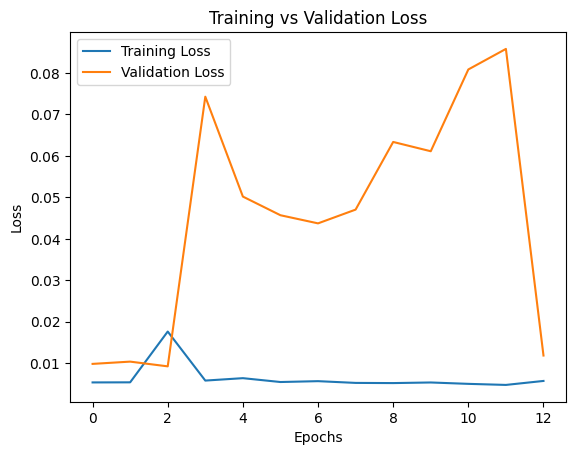

In [ ]:
import matplotlib.pyplot as plt
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
history = autoencoder.fit(X_train, Y_train,
                          epochs=50,
                          batch_size=16,
                          validation_data=(X_val, Y_val),
                          callbacks=[early_stopping])

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


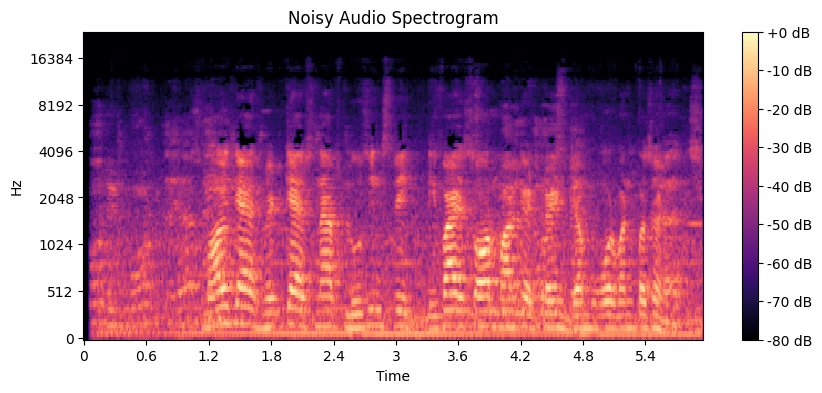

In [ ]:
import librosa
import numpy as np
import librosa.display
import matplotlib.pyplot as plt

def load_audio_as_spectrogram(file_path, n_mels=128):
    y, sr = librosa.load(file_path, sr=None)  # Load audio
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)  # Convert to dB scale
    return mel_spec_db, sr

# Example usage:
noisy_audio_path = "/content/drive/MyDrive/Noisy.wav"
noisy_spectrogram, sr = load_audio_as_spectrogram(noisy_audio_path)

plt.figure(figsize=(10, 4))
librosa.display.specshow(noisy_spectrogram, sr=sr, x_axis="time", y_axis="mel")
plt.colorbar(format="%+2.0f dB")
plt.title("Noisy Audio Spectrogram")
plt.show()


In [ ]:
# Ensure correct input shape (Expand dims for batch size & channel)
noisy_spectrogram = np.expand_dims(noisy_spectrogram, axis=-1)  # Add channel dim
noisy_spectrogram = np.expand_dims(noisy_spectrogram, axis=0)   # Add batch dim


In [ ]:
import tensorflow as tf

expected_time_steps = 500  # Model expects this

# Trim if it's too long
noisy_spectrogram = noisy_spectrogram[:, :, :expected_time_steps, :]

# If it's too short, pad it
if noisy_spectrogram.shape[2] < expected_time_steps:
    noisy_spectrogram = tf.pad(
        noisy_spectrogram,
        [[0, 0], [0, 0], [0, expected_time_steps - noisy_spectrogram.shape[2]], [0, 0]],
        mode="CONSTANT"
    )

print("Fixed Input Shape:", noisy_spectrogram.shape)  # Should be (1, 128, 500, 1)


Fixed Input Shape: (1, 128, 500, 1)


In [ ]:
input_layer = tf.keras.layers.Input(shape=(128, None, 1))  # Use None instead of 500


In [ ]:
denoised_spectrogram = autoencoder.predict(noisy_spectrogram)
denoised_spectrogram = np.squeeze(denoised_spectrogram)  # Remove batch dimension


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


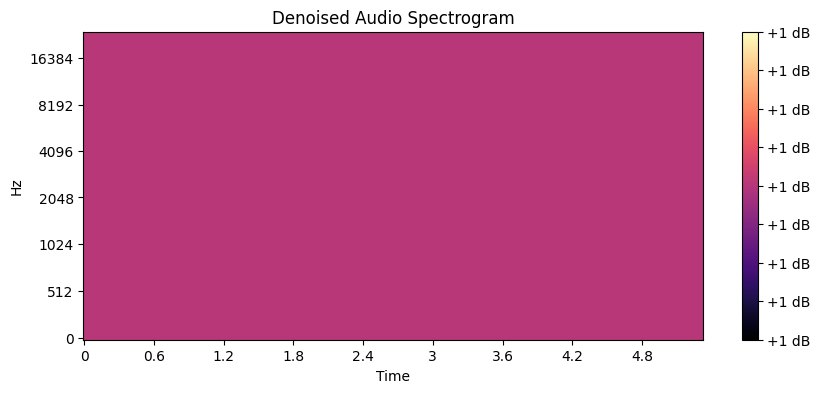

In [ ]:
denoised_spectrogram = autoencoder.predict(noisy_spectrogram)

# Remove batch dimension for visualization
denoised_spectrogram = np.squeeze(denoised_spectrogram)

plt.figure(figsize=(10, 4))
librosa.display.specshow(denoised_spectrogram, sr=sr, x_axis="time", y_axis="mel")
plt.colorbar(format="%+2.0f dB")
plt.title("Denoised Audio Spectrogram")
plt.show()


In [ ]:
def spectrogram_to_audio(mel_spec_db, sr):
    mel_spec = librosa.db_to_power(mel_spec_db)  # Convert dB back to power
    audio = librosa.feature.inverse.mel_to_audio(mel_spec, sr=sr)
    return audio

# Convert spectrogram to waveform
denoised_audio = spectrogram_to_audio(denoised_spectrogram, sr)

# Save as .wav
import soundfile as sf
sf.write("denoised_audio.wav", denoised_audio, sr)


In [ ]:
from IPython.display import Audio

# Play the generated audio file
Audio("denoised_audio.wav")
